In [28]:

# dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import folium
import geopandas

#https://github.com/datakind/sep21-housing-insecurity/blob/main/code/jeffng/DataKind.ipynb

import geoplot
#extend borders 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
#set wd - Work 
#os.chdir("/Users/jordan/Documents/GitHub/datakind_housing_insecurity_2021-copy/housing_loss_data")

#set wd - Home
os.chdir("/Users/jordancreenaune/Desktop/Python_for_Data_Science/DataKind/September/housing_loss_data")
#import data 
data = pd.read_csv("orange_fl_processed_2017_to_2019_20210916.csv")

In [4]:
result=data.set_index('census_tract_GEOID')


In [5]:
#check what columns to use 
data.columns


Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

In [6]:
#Select data that we are interested in - census tract + housing loss 

map_data=result.reset_index()[['census_tract_GEOID', 'housing-loss-index']]

In [7]:
map_data.head()

,census_tract_GEOID,housing-loss-index
0,12095016602,0.765360
1,12095015902,0.425127
2,12095016407,1.343664
3,12095016507,0.463515
4,12095017501,0.947435


In [8]:
data1 = pd.read_csv("/Users/jordancreenaune/Desktop/Python_for_Data_Science/DataKind/September/American_Community_Survey_Data/orange_acs5-2019_census.csv")
data2 = pd.read_csv("/Users/jordancreenaune/Desktop/Python_for_Data_Science/DataKind/September/American_Community_Survey_Data/orange_acs5-2014_census.csv")


In [18]:
df = gpd.read_file('orange_fl_2010_tracts_formatted.geojson')


#orangec = pd.read_csv("orange_fl_processed_2017_to_2019_20210916.csv")

In [19]:
df

,census_tract_GEOID,geometry
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590..."
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573..."
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558..."
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538..."
...,...,...
202,12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684..."
203,12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527..."
204,12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519..."
205,12095014908,"POLYGON ((-81.49210 28.56448, -81.49211 28.564..."


In [20]:
for col in df.columns:
    print(col)

census_tract_GEOID
geometry


In [21]:
#df.geometry




In [12]:
#df=df.geometry

In [22]:
import geoplot
import geoplot.crs as gcrs

In [23]:
map_data=map_data.reset_index()
df=df.reset_index()

In [24]:
for col in df.columns:
    print(col)

index
census_tract_GEOID
geometry


,level_0,index_x,census_tract_GEOID,housing-loss-index,index_y,geometry
0,0,0,12095016602,0.765360,2,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
1,1,1,12095015902,0.425127,63,"POLYGON ((-81.37318 28.58586, -81.37317 28.585..."


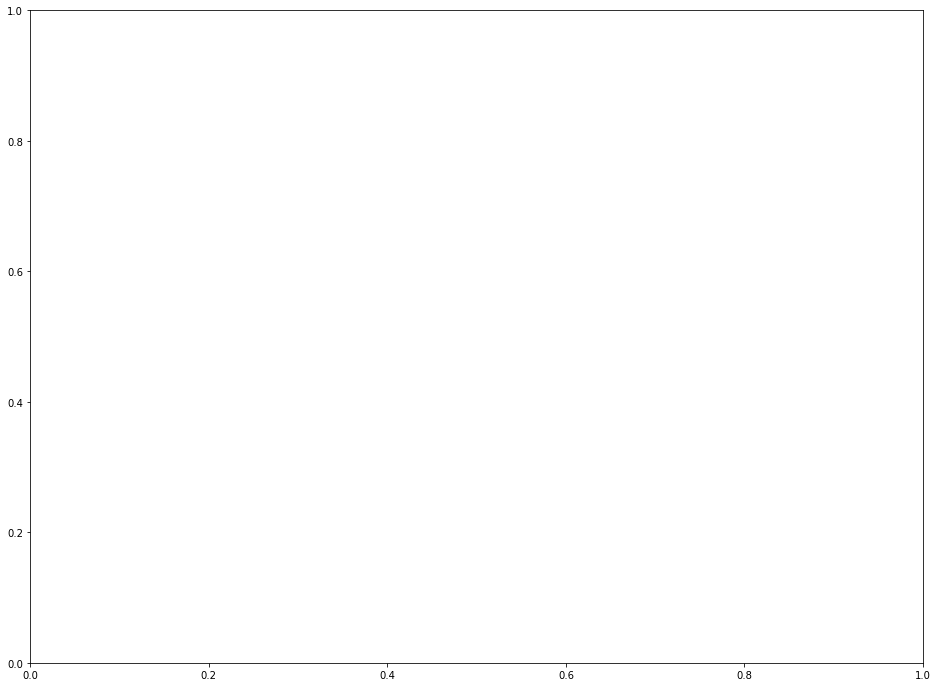

In [25]:

import geoplot as gplt
import matplotlib.pyplot as plt
map_data.census_tract_GEOID = map_data.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID= df.census_tract_GEOID.astype(str).astype(int)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
fullData = map_data.merge(df, left_on=['census_tract_GEOID'], right_on=['census_tract_GEOID'])
fullData.head(2)

In [26]:
# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['housing-loss-index'], k=10)

In [29]:
gdf = geopandas.GeoDataFrame(fullData, crs="EPSG:4326")


In [32]:
#this does not work 
florida="Data_04/US_STATE.shp"
florida.geometry

AttributeError: 'str' object has no attribute 'geometry'